In [1]:
%cd ../..

/Users/maayanlab/Library/Mobile Documents/com~apple~CloudDocs/Documents/Projects/analysis-pipelines/geneshot-benchmark


In [2]:
%ls

feather.dir/           s1-normalized.dir/     s4-merged_auc.dir/
libraries.dir/         s2-average_scores.dir/ s5-auc_plots.dir/
pipeline/              s3-auc_scores.dir/
rawdata.dir/           s3-auc_scores2.dir/


In [3]:
import pandas as pd

In [5]:
%load_ext rpy2.ipython

In [6]:
%R require(ggplot2)

/Users/maayanlab/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

In [17]:
df = pd.read_table('s4-merged_auc.dir/library_auc.txt')#.query('normalization == "zscore"')
df.head()

,term_name,auc,normalization,library,nr_genes
0,AKT1_human_kinase_ARCHS4_coexpression,0.663120,autorif_overlap,ARCHS4_Kinases_Coexp,299
1,AKT1_human_kinase_ARCHS4_coexpression,0.688266,autorif_overlap_zscore,ARCHS4_Kinases_Coexp,299
2,AKT1_human_kinase_ARCHS4_coexpression,0.991607,correlation,ARCHS4_Kinases_Coexp,299
3,AKT1_human_kinase_ARCHS4_coexpression,0.986900,correlation_abs,ARCHS4_Kinases_Coexp,299
4,AKT1_human_kinase_ARCHS4_coexpression,0.964667,fraction,ARCHS4_Kinases_Coexp,299


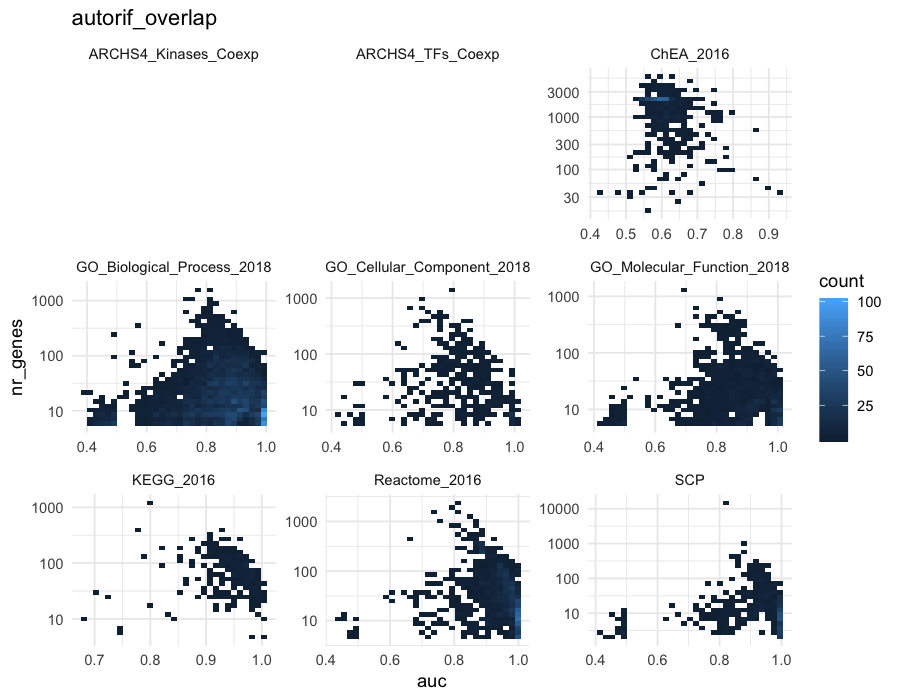

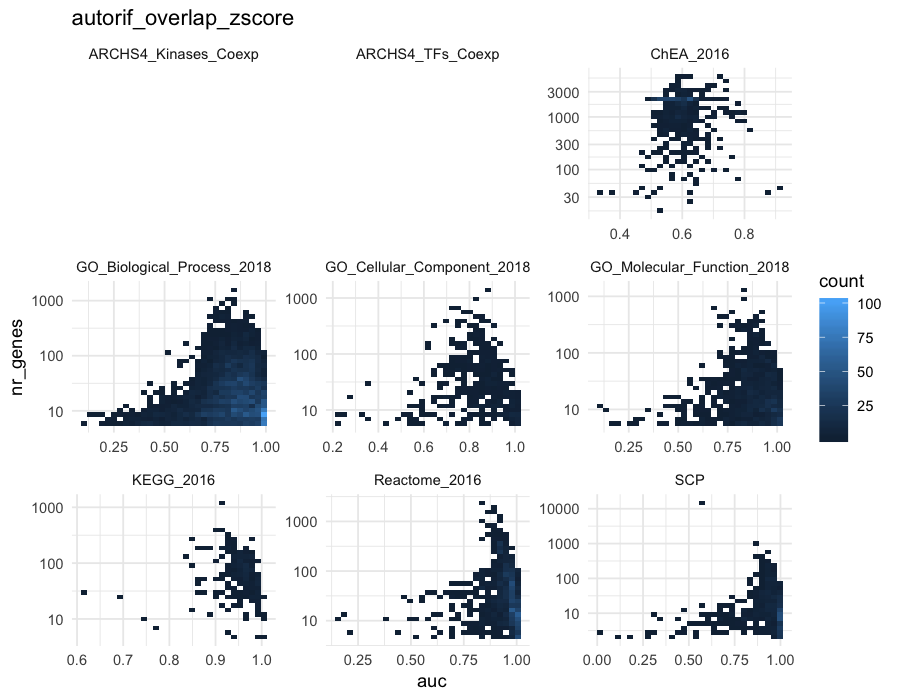

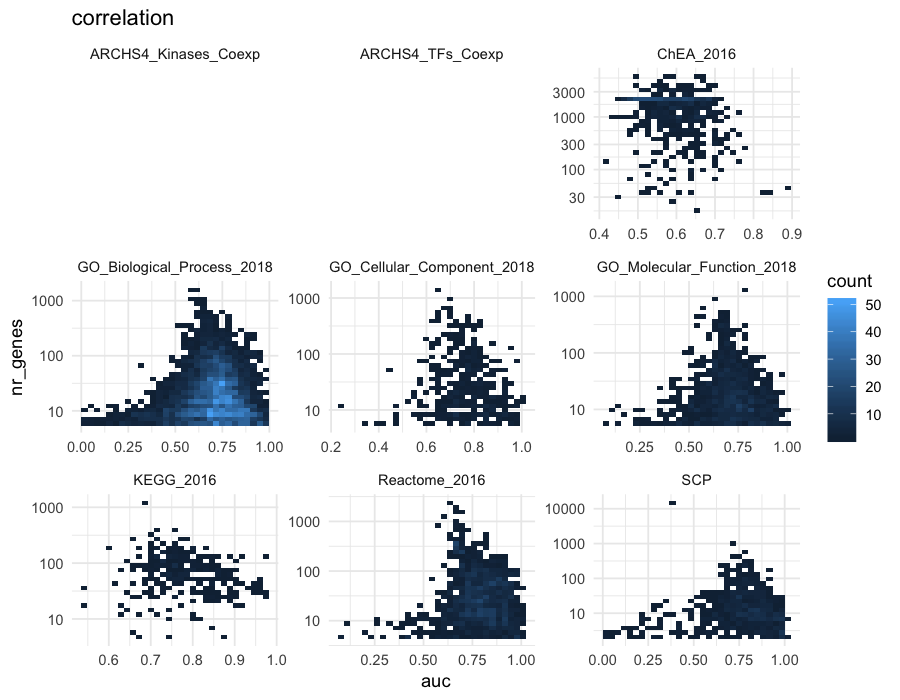

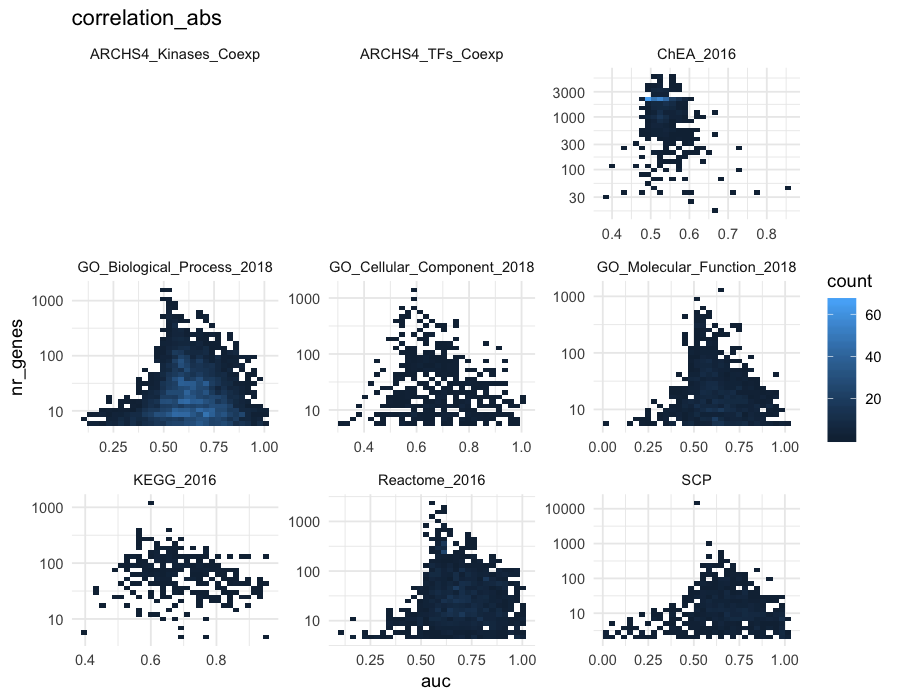

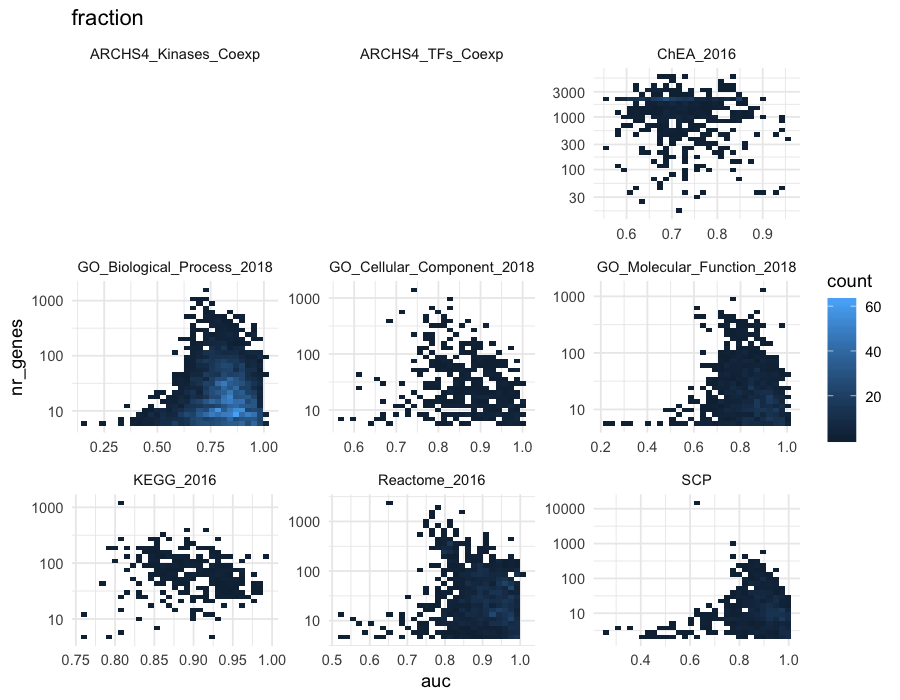

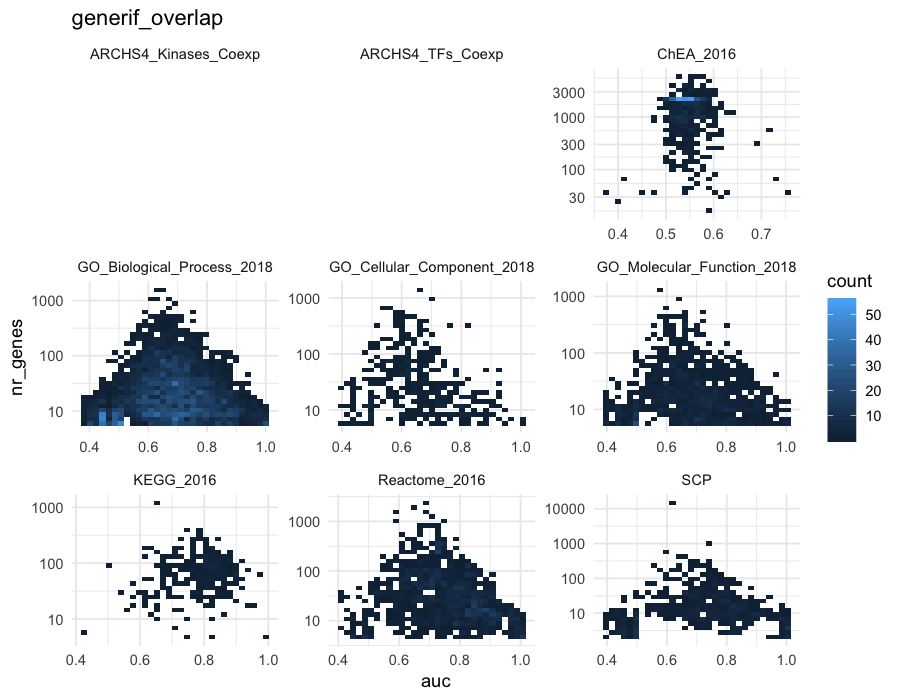

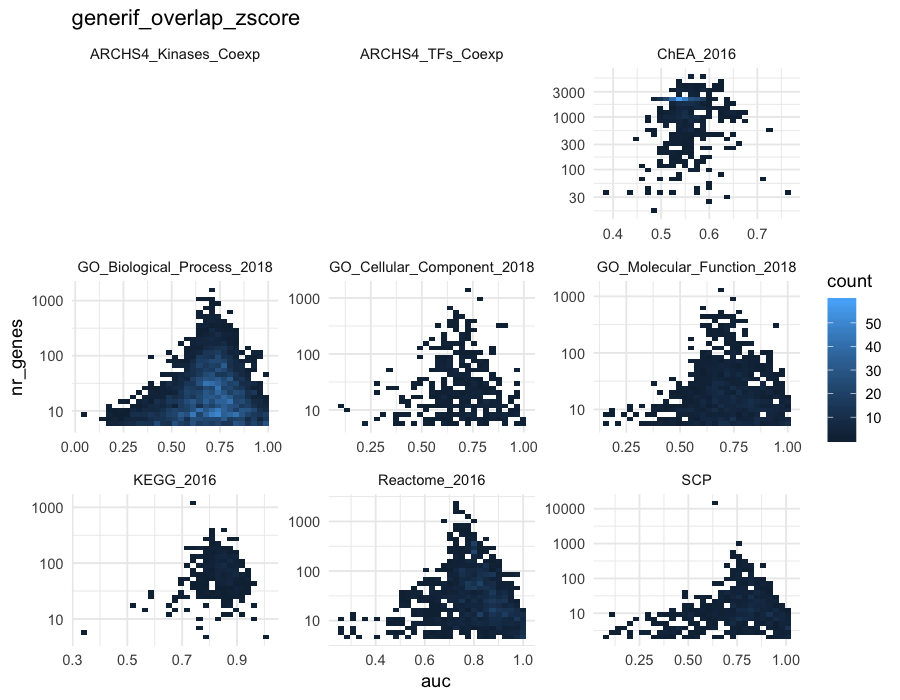

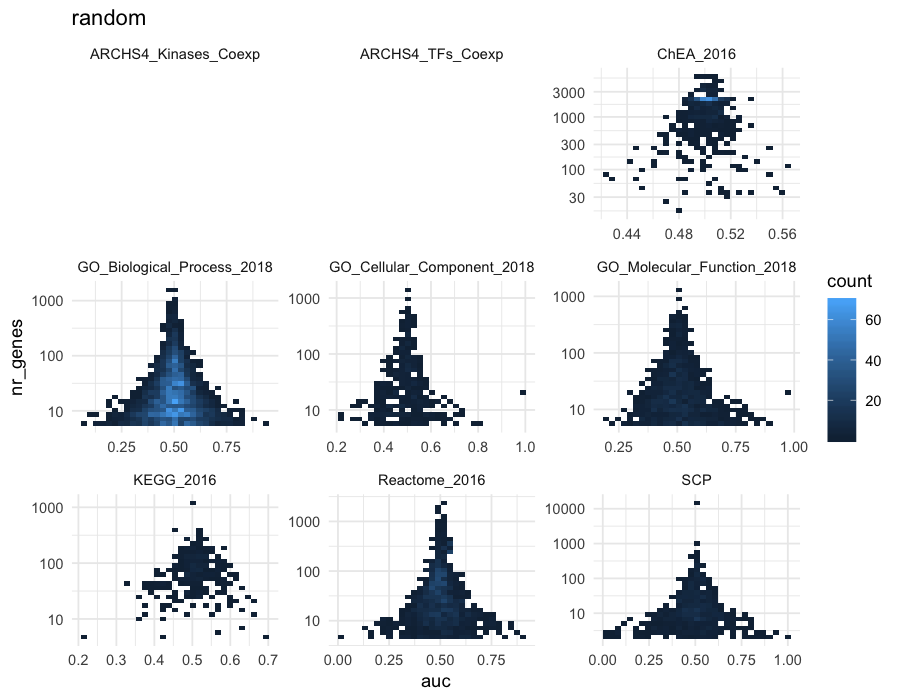

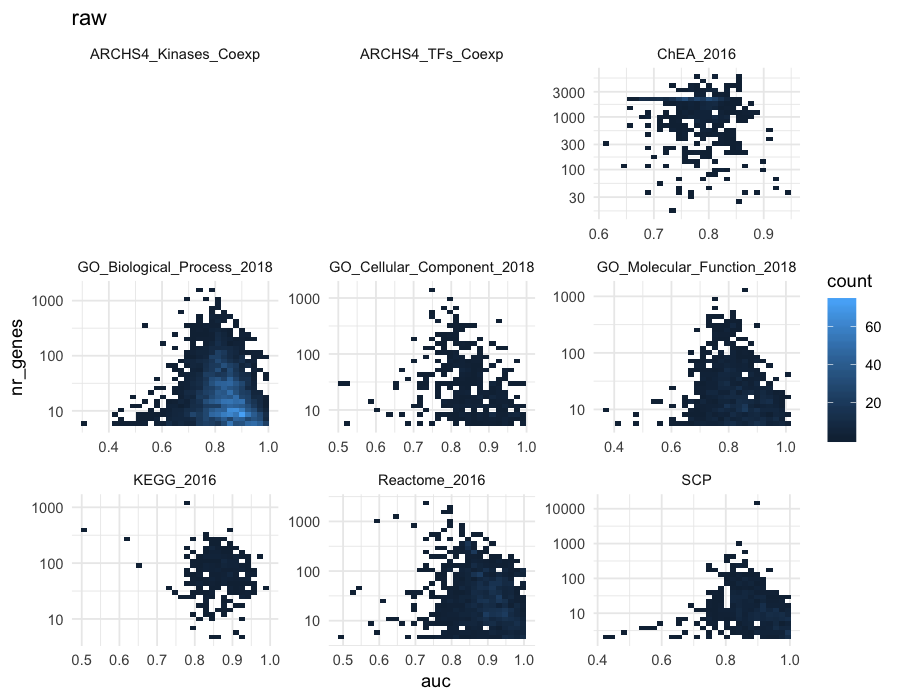

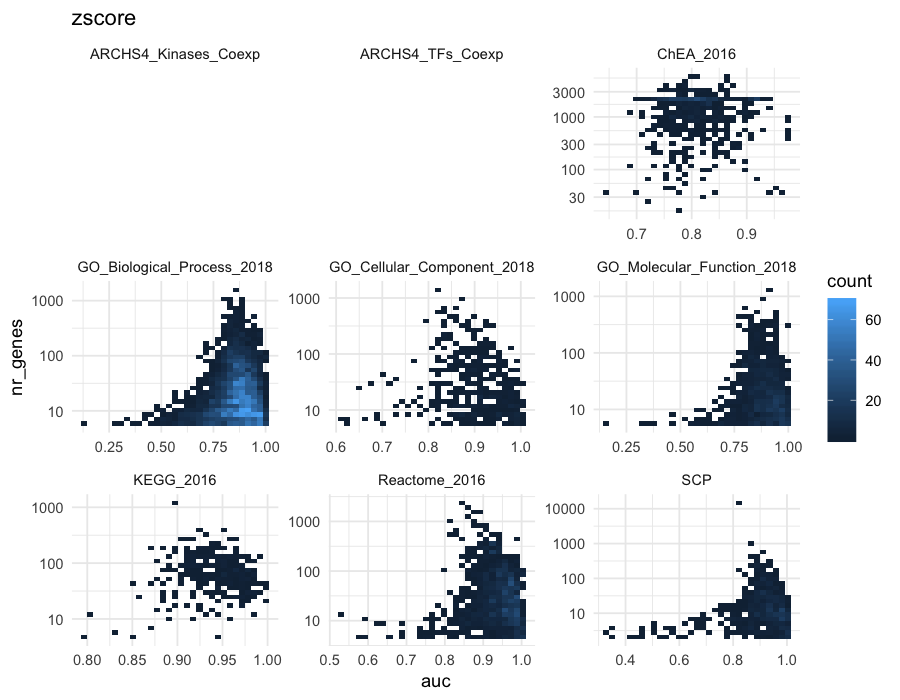

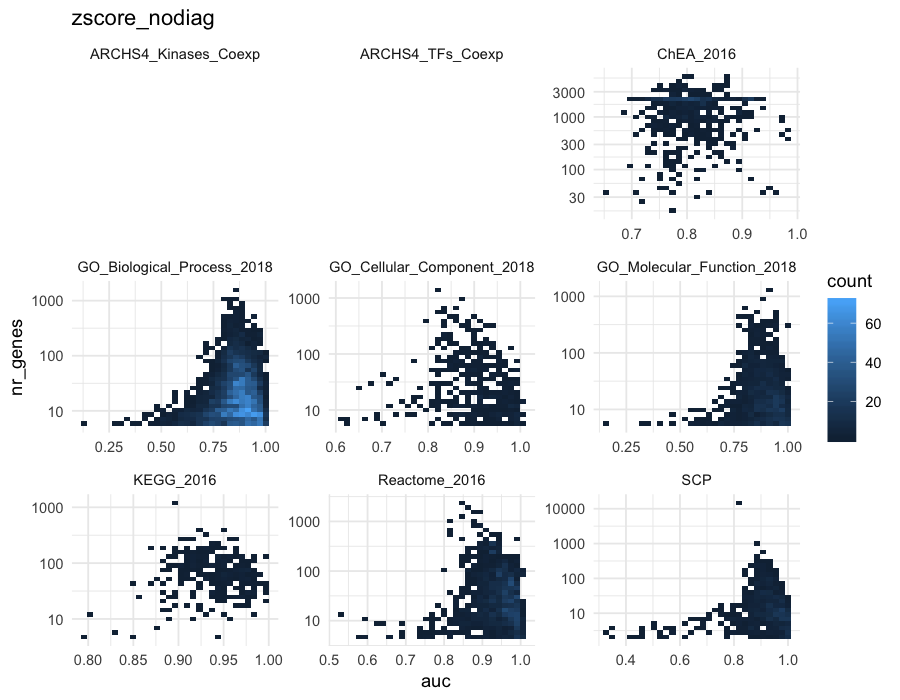

In [21]:
for normalization in df['normalization'].unique():
    plot_df = df[df['normalization'] == normalization]
    %R -i plot_df,normalization -h 700 -w 900 -r 120 print(ggplot(plot_df, aes(x=auc, y=nr_genes)) + geom_bin2d(bins=30) +     scale_y_log10() +     facet_wrap(~library, scales='free') +     theme_minimal() + ggtitle(normalization))